## Step 1

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as mn


In [2]:
# Load Titanic training data
df = pd.read_csv('train.csv')

In [3]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [4]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [5]:
df.isna().sum().index

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

## Step 2

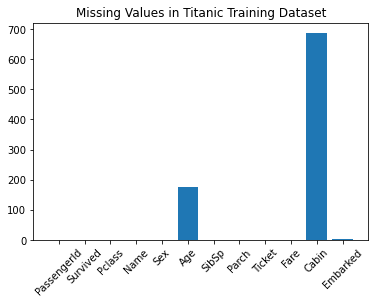

In [6]:
plt.title("Missing Values in Titanic Training Dataset")
plt.xticks(rotation=45)
plt.bar(x=df.isna().sum().index, height=df.isna().sum());

<AxesSubplot:>

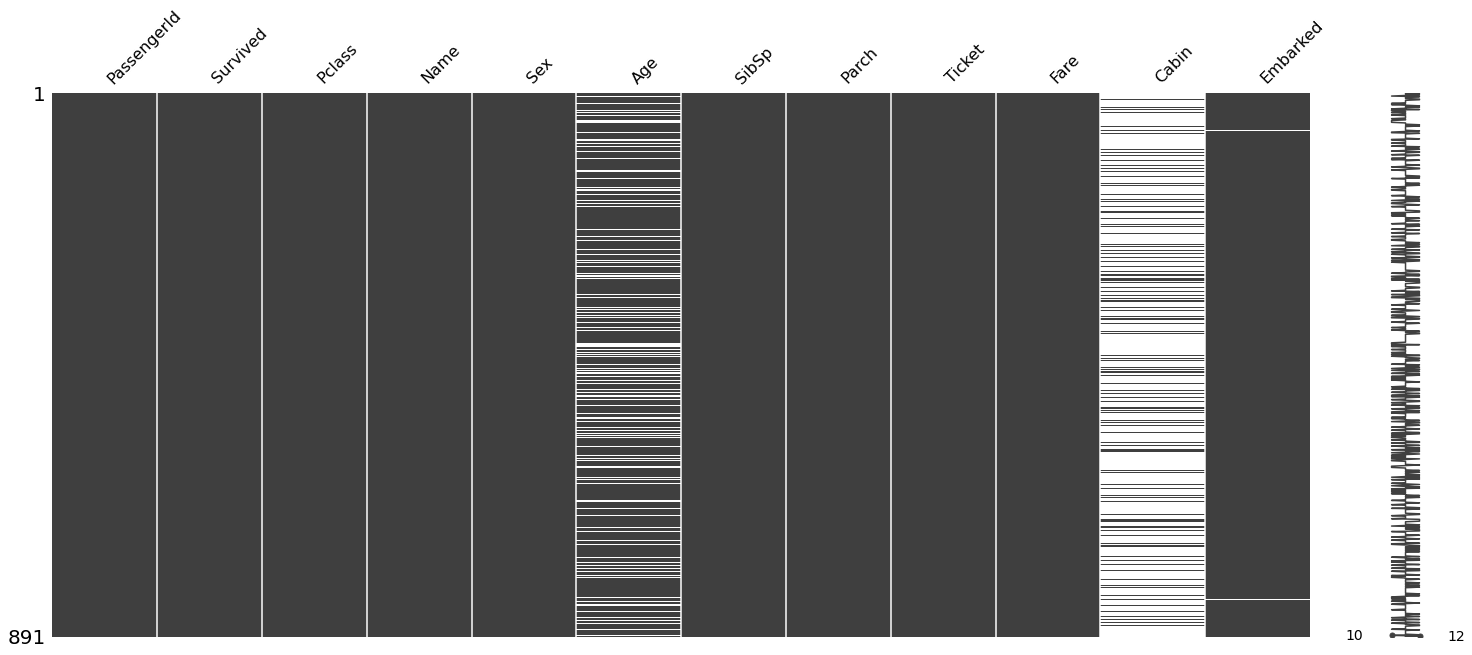

In [7]:
mn.matrix(df)

In [8]:
# Column with the max number of missing values & total missing values
df.isna().sum()[df.isna().sum() == max(df.isna().sum())]


Cabin    687
dtype: int64

In [9]:
# Drop rows where Embarked contains NaN
df = df[df.notna()['Embarked']]
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [10]:
# Dunno what cabbin
df['Cabin'].fillna("**¯\\_(ツ)_/¯**", inplace=True)

In [11]:
df['Cabin'].head()

0    **¯\_(ツ)_/¯**
1              C85
2    **¯\_(ツ)_/¯**
3             C123
4    **¯\_(ツ)_/¯**
Name: Cabin, dtype: object

## Part 3

In [12]:
# Family Count column
df['FamilyCount'] = df['SibSp'] + df['Parch']

In [13]:
df[['FamilyCount', 'SibSp', 'Parch']][df['FamilyCount'] > 2]

,FamilyCount,SibSp,Parch
7,4,3,1
13,6,1,5
16,5,4,1
24,4,3,1
25,6,1,5
...,...,...,...
850,6,4,2
858,3,0,3
863,10,8,2
885,5,0,5


In [14]:
# Reverend Check
df['IsReverend'] = df.apply(lambda x: 1 if "Rev." in x['Name'] else 0, axis=1)
df[['Name', 'IsReverend']].tail(10)


,Name,IsReverend
881,"Markun, Mr. Johann",0
882,"Dahlberg, Miss. Gerda Ulrika",0
883,"Banfield, Mr. Frederick James",0
884,"Sutehall, Mr. Henry Jr",0
885,"Rice, Mrs. William (Margaret Norton)",0
886,"Montvila, Rev. Juozas",1
887,"Graham, Miss. Margaret Edith",0
888,"Johnston, Miss. Catherine Helen ""Carrie""",0
889,"Behr, Mr. Karl Howell",0
890,"Dooley, Mr. Patrick",0


In [15]:
# One hot encoding of Embarking location
df['Embarked_C'] = df.apply(lambda x: 1 if x['Embarked'] == "C" else 0, axis=1)
df['Embarked_Q'] = df.apply(lambda x: 1 if x['Embarked'] == "Q" else 0, axis=1)
df['Embarked_S'] = df.apply(lambda x: 1 if x['Embarked'] == "S" else 0, axis=1)

In [16]:
df[['Embarked', 'Embarked_C', 'Embarked_Q', 'Embarked_S']].head()

,Embarked,Embarked_C,Embarked_Q,Embarked_S
0,S,0,0,1
1,C,1,0,0
2,S,0,0,1
3,S,0,0,1
4,S,0,0,1


## Step 4

In [17]:
# Overall survival rate
df['Survived'].mean()

0.38245219347581555

In [18]:
# Survival rate by gender
df.groupby(by="Sex").mean()['Survived']

# Males survived at a lower rate than women

Sex
female    0.740385
male      0.188908
Name: Survived, dtype: float64

In [19]:
# Survival rate by passenger class
df.groupby(by='Pclass').mean()['Survived']

# First class surivied at the highest rate, followed by second class and third, repectively

Pclass
1    0.626168
2    0.472826
3    0.242363
Name: Survived, dtype: float64

In [20]:
# Total number of Rev. survived
df.groupby(by='IsReverend').sum()['Survived']

# 0 Reverends survived

IsReverend
0    340
1      0
Name: Survived, dtype: int64

In [21]:
# Suvival rate of passengers with cabin: **¯\\_(ツ)_/¯**

df.groupby(by="Cabin").mean()['Survived']

# Pasengers riding in the dunno cabin faired worse than averge with a survival rate of only 29.99% 

Cabin
**¯\_(ツ)_/¯**    0.299854
A10              0.000000
A14              0.000000
A16              1.000000
A19              0.000000
                   ...   
F33              1.000000
F38              0.000000
F4               1.000000
G6               0.500000
T                0.000000
Name: Survived, Length: 147, dtype: float64

In [22]:
# Survival rate by port of embarkation
df.groupby(by="Embarked").mean()['Survived']

Embarked
C    0.553571
Q    0.389610
S    0.336957
Name: Survived, dtype: float64

In [23]:
 # Survival rate by passenger class
df[df['Age'] < 12].groupby(by="Pclass").mean()['Survived']

# children in class 2 had a higher survival rate than in class 1, which is surprising. Children in class 3 did better than adults in class 3, but
# right around the ship average for passingers with a 2nd class ticket. So "good", all things considered?

Pclass
1    0.750000
2    1.000000
3    0.404255
Name: Survived, dtype: float64

In [24]:
# Did the Captain survive?
df['IsCrew'] = df.apply(lambda x: 1 if "Capt." in x['Name'] else 0, axis=1)
df[df['IsCrew'] == 1]

# No, Captain Edward Gifford Crosby went down with the ship


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilyCount,IsReverend,Embarked_C,Embarked_Q,Embarked_S,IsCrew
745,746,0,1,"Crosby, Capt. Edward Gifford",male,70.0,1,1,WE/P 5735,71.0,B22,S,2,0,0,0,1,1


In [25]:
# Maximum Fare paid by a surviving passinger
df[df['Survived'] == 1]['Fare'].max()

# They paid $512.33 .. Roughly $5,000 by today's standards. 

512.3292

In [26]:
# Suvival rates by family size
df.groupby(by=['FamilyCount']).mean()

# Having a small family appars to have significantly boosted the survival rate


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,IsReverend,Embarked_C,Embarked_Q,Embarked_S,IsCrew
FamilyCount,,,,,,,,,,,,
0,458.044860,0.300935,2.405607,32.131841,0.000000,0.000000,21.023035,0.007477,0.158879,0.106542,0.734579,0.000000
1,412.838509,0.552795,1.919255,31.391511,0.763975,0.236025,49.894129,0.012422,0.316770,0.055901,0.627329,0.000000
2,448.352941,0.578431,2.225490,26.035806,0.872549,1.127451,39.692482,0.000000,0.225490,0.058824,0.715686,0.009804
3,514.344828,0.724138,2.068966,18.274815,1.344828,1.655172,54.864510,0.000000,0.241379,0.000000,0.758621,0.000000
4,367.866667,0.200000,2.666667,20.818182,2.133333,1.866667,58.094453,0.000000,0.133333,0.000000,0.866667,0.000000
5,400.136364,0.136364,2.590909,18.409091,2.818182,2.181818,73.722727,0.000000,0.000000,0.227273,0.772727,0.000000
6,355.750000,0.333333,3.000000,15.166667,3.250000,2.750000,29.366667,0.000000,0.000000,0.000000,1.000000,0.000000
7,393.833333,0.000000,3.000000,15.666667,4.333333,2.666667,46.900000,0.000000,0.000000,0.000000,1.000000,0.000000
10,481.714286,0.000000,3.000000,NaN,8.000000,2.000000,69.550000,0.000000,0.000000,0.000000,1.000000,0.000000


## Step 5

In [ ]:
family_survival = df.groupby(by=['Pclass','FamilyCount'])['Pclass', 'FamilyCount', 'Survived'].mean()
# if we take a look deeper and break it down by ticket class, a family of 4 did the best, but you definitely didnt want to be traveling
# as a family of 5 or more

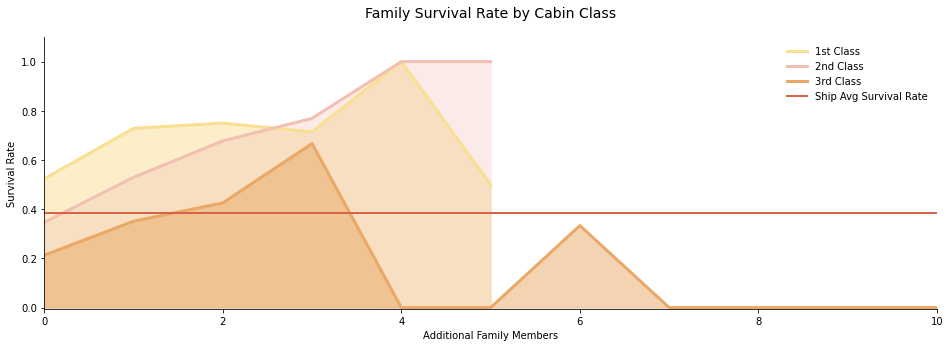

In [29]:
colors = {
    'first':'#F9DF92',
    'second':'#F3BFB3',
    'third':'#EAA867',
    'average':'#D96348'
}

# Establish figure size.
plt.figure(figsize=(16, 5))

# 1st Class 
plt.plot(df.groupby(by=['Pclass', 'FamilyCount']).mean()['Survived'][1], color=colors['first'], label="1st Class", linewidth=3)
plt.fill_between(df.groupby(by=['Pclass', 'FamilyCount']).mean()['Survived'][1].index, 
df.groupby(by=['Pclass', 'FamilyCount']).mean()['Survived'][1],
alpha=0.5, color=colors['first'], label="_hidden")

# 2nd Class  
plt.plot(df.groupby(by=['Pclass', 'FamilyCount']).mean()['Survived'][2], color=colors['second'], label="2nd Class", linewidth=3)
plt.fill_between(df.groupby(by=['Pclass', 'FamilyCount']).mean()['Survived'][2].index, 
df.groupby(by=['Pclass', 'FamilyCount']).mean()['Survived'][2],
alpha=0.3, color=colors['second'], label="_hidden")

# 3rd Class
plt.plot(df.groupby(by=['Pclass', 'FamilyCount']).mean()['Survived'][3], color=colors['third'], label="3rd Class", linewidth=3)
plt.fill_between(df.groupby(by=['Pclass', 'FamilyCount']).mean()['Survived'][3].index, 
df.groupby(by=['Pclass', 'FamilyCount']).mean()['Survived'][3],
alpha=0.5, color=colors['third'], label="_hidden")

# Plot Details
plt.title("Family Survival Rate by Cabin Class", y=1.05, size=14)
plt.axhline(df['Survived'].mean(), c=colors['average'], label="Ship Avg Survival Rate", linewidth=2)
plt.axis([0, 10, -0.005, 1.1])
sns.despine(top=True, right=True, left=False, bottom=False)

plt.ylabel("Survival Rate")
plt.xlabel("Additional Family Members")
plt.legend(loc="upper right", frameon=False);

# Taking a deeper look at survival rate by family size, if we break the survival rate down by passenger class, it is clear traveling with
# a larger family is beneficial for 1st & second class passengers, but anything larger than a family of 4 for 3rd class passingers is not
# a great situation.

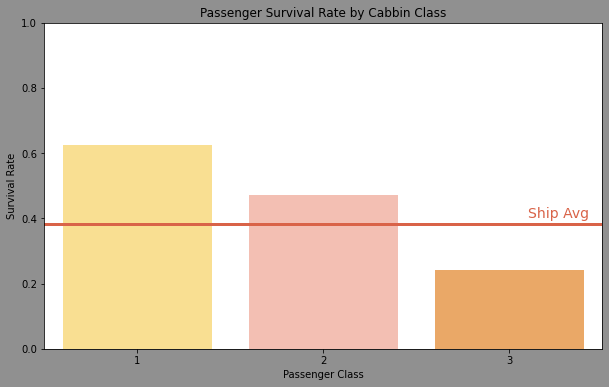

In [39]:
# Survival rate by passenger class
passinger_class = df.groupby(by='Pclass').mean()['Survived']
passinger_class.index

plt.figure(figsize=(10,6))
plt.rcParams['figure.facecolor'] = "#909090"
plt.rcParams['axes.facecolor'] = "white"
# via User: BurlyPaulson (Source: https://stackoverflow.com/a/40371037)

plt.bar(x=passinger_class.index, height=passinger_class, label="Passinger Class",
color=[colors['first'], colors['second'], colors['third']])
plt.axhline(df['Survived'].mean(), c=colors['average'], label="Ship Avg Survival Rate", linewidth=3)
plt.text(3.1, df['Survived'].mean()+.02, s="Ship Avg", color=colors['average'], size=14)
plt.xticks([1, 2, 3])
plt.axis([0.5, 3.5, 0, 1])
plt.title("Passenger Survival Rate by Cabbin Class")
plt.ylabel("Survival Rate")
plt.xlabel("Passenger Class");



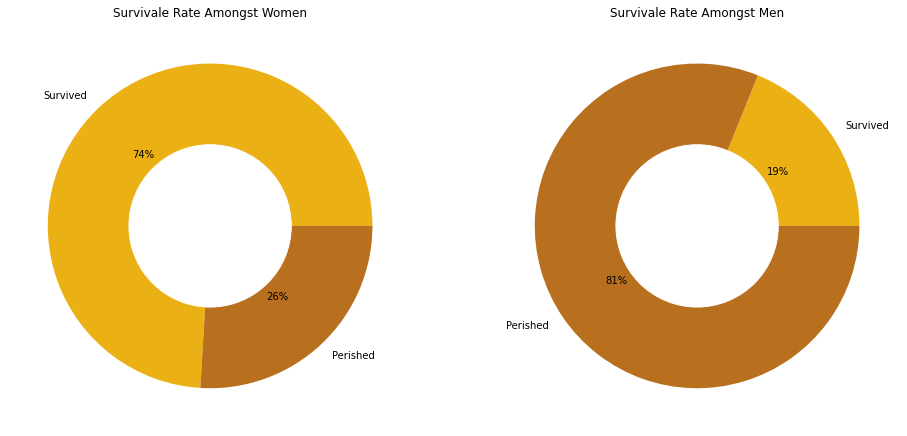

In [41]:
# Survival rate by gender
females = [df.groupby(by="Sex").mean()['Survived'][0], (1-df.groupby(by="Sex").mean()['Survived'][0])]
males = [df.groupby(by="Sex").mean()['Survived'][1], (1-df.groupby(by="Sex").mean()['Survived'][1])]

color_survive = {
    'survived': "#EBB014",
    'perished': "#B86F1E"
}
names = ["Survived", "Perished"]

plt.figure(figsize=(16, 8))
plt.rcParams['figure.facecolor'] = "white"
plt.rcParams['axes.facecolor'] = "white"
# Fig 1 - Women
ax1 = plt.subplot(1, 2, 1) # number of rows by number of columns by which individual plot to reference
ax1.pie(x=females, labels=names, colors=[color_survive['survived'], color_survive['perished']], autopct='%1.0f%%')
ax1.set_facecolor("white")
ax1.set_title("Survivale Rate Amongst Women")
# add a circle at the center to transform it in a donut chart
my_circle=plt.Circle((0,0), 0.5, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)

# Fig 2 - Men
ax2 = plt.subplot(1, 2, 2) # number of rows by number of columns by which individual plot to reference
ax2.pie(x=males, labels=names, colors=[color_survive['survived'], color_survive['perished']], autopct='%1.0f%%')
ax2.set_facecolor("white")
ax2.set_title("Survivale Rate Amongst Men")
# add a circle at the center to transform it in a donut chart
my_circle=plt.Circle((0,0), 0.5, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle);

# Pies & circles Adapted from Source: https://www.python-graph-gallery.com/donut-plot/
# Percent labels adapted from Source: https://stackoverflow.com/a/21580755


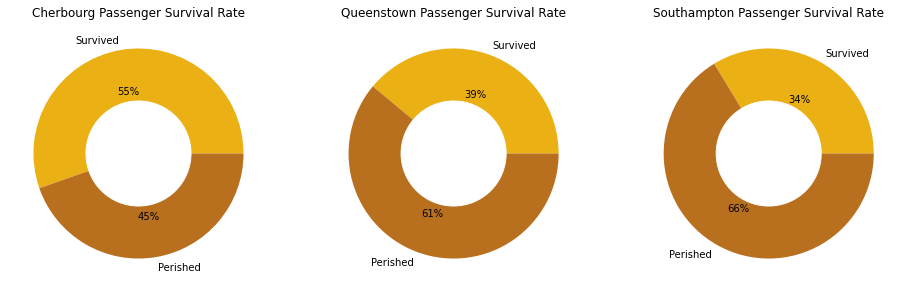

In [45]:
# Survival rate by departure port
embark_c = [df.groupby(by="Embarked").mean()['Survived'][0], (1-df.groupby(by="Embarked").mean()['Survived'][0])]
embark_q = [df.groupby(by="Embarked").mean()['Survived'][1], (1-df.groupby(by="Embarked").mean()['Survived'][1])]
embark_s = [df.groupby(by="Embarked").mean()['Survived'][2], (1-df.groupby(by="Embarked").mean()['Survived'][2])]

plt.figure(figsize=(16, 8))
# Fig 1 - Cherbourg
ax1 = plt.subplot(1, 3, 1) # number of rows by number of columns by which individual plot to reference
ax1.pie(x=embark_c, labels=names, colors=[color_survive['survived'], color_survive['perished']], autopct='%1.0f%%')
ax1.set_facecolor("white")
ax1.set_title("Cherbourg Passenger Survival Rate")
# add a circle at the center to transform it in a donut chart
my_circle=plt.Circle((0,0), 0.5, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)

# Fig 2 - Queenstown
ax2 = plt.subplot(1, 3, 2) # number of rows by number of columns by which individual plot to reference
ax2.pie(x=embark_q, labels=names, colors=[color_survive['survived'], color_survive['perished']], autopct='%1.0f%%')
ax2.set_facecolor("white")
ax2.set_title("Queenstown Passenger Survival Rate")
# add a circle at the center to transform it in a donut chart
my_circle=plt.Circle((0,0), 0.5, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)

# Fig 3 - Southampton
ax3 = plt.subplot(1, 3, 3) # number of rows by number of columns by which individual plot to reference
ax3.pie(x=embark_s, labels=names, colors=[color_survive['survived'], color_survive['perished']], autopct='%1.0f%%')
ax3.set_facecolor("white")
ax3.set_title("Southampton Passenger Survival Rate")
# add a circle at the center to transform it in a donut chart
my_circle=plt.Circle((0,0), 0.5, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle);

# Pies & circles Adapted from Source: https://www.python-graph-gallery.com/donut-plot/
# Percent labels adapted from Source: https://stackoverflow.com/a/21580755

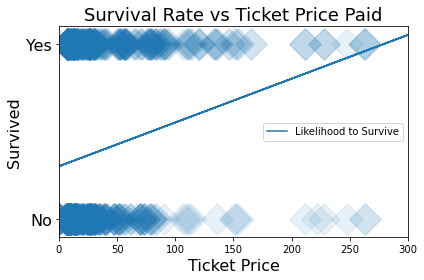

In [43]:
# Survival rate by fare paid
df['Fare'].value_counts

# df['Fare'].hist(bins=[35,70,105,140,175])

fig, ax = plt.subplots()
ax.set_title("Survival Rate vs Ticket Price Paid", size=18)

# Trend Line
m, b = np.polyfit(df['Fare'], df['Survived'], 1)
plt.plot(df['Fare'], m*df['Fare']+b, label="Likelihood to Survive")
# Regression line adapted from: (https://www.statology.org/scatterplot-with-regression-line-python/)

# Survival dots
plt.scatter(x=df['Fare'], y=df['Survived'], marker='D', s=500, alpha=.1)
plt.axis([0, 300, -0.1, 1.1])

plt.yticks([0, 1])
ax.set_yticklabels(["No", "Yes"])
ax.tick_params(axis='y', which='major', labelsize=16)

plt.legend()
plt.ylabel("Survived", size=16)
plt.xlabel("Ticket Price", size=16)
plt.tight_layout();
